<a href="https://colab.research.google.com/github/31shivam/ALY6110/blob/Google-Collab/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) **Preparing google colab PySpark Session**

In [53]:
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

# Unzip the file
!tar xf spark-3.3.1-bin-hadoop3.tgz

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.1-bin-hadoop3'

# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()



'/content/spark-3.3.1-bin-hadoop3'

In [6]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [58]:
# Import a Spark function from library
from pyspark.sql.functions import col

df=spark.sql("show databases")
df.show()


+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [9]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [10]:
df=spark.sql("show databases")
df.show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



2) **Importing and reading the dataset**


In [11]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [12]:
## Read Data

dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [15]:
dataset.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



3) **Combining features to a single vector columns using VectorAssembler (all columns other than target column 'medv')**

In [41]:
from pyspark.ml.feature import VectorAssembler

#Input all the features in one vector column
assembler = VectorAssembler (inputCols=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat'], outputCol='Attributes')

output= assembler.transform(dataset)

data=output.select(['Attributes'])
data.show()

+--------------------+
|          Attributes|
+--------------------+
|[0.00632,18.0,2.3...|
|[0.02731,0.0,7.07...|
|[0.02729,0.0,7.07...|
|[0.03237,0.0,2.18...|
|[0.06905,0.0,2.18...|
|[0.02985,0.0,2.18...|
|[0.08829,12.5,7.8...|
|[0.14455,12.5,7.8...|
|[0.21124,12.5,7.8...|
|[0.17004,12.5,7.8...|
|[0.22489,12.5,7.8...|
|[0.11747,12.5,7.8...|
|[0.09378,12.5,7.8...|
|[0.62976,0.0,8.14...|
|[0.63796,0.0,8.14...|
|[0.62739,0.0,8.14...|
|[1.05393,0.0,8.14...|
|[0.7842,0.0,8.14,...|
|[0.80271,0.0,8.14...|
|[0.7258,0.0,8.14,...|
+--------------------+
only showing top 20 rows



4) **Standardizing features for principal component analysis**

In [42]:
from pyspark.ml.feature import VectorAssembler,StandardScaler,PCA
## Standardise the dataset
scaler= StandardScaler(inputCol='Attributes',outputCol='scaledFeature',withMean=True,withStd=True).fit(data)
df_scaled=scaler.transform(data)
df_scaled.show(5)
     

+--------------------+--------------------+
|          Attributes|       scaledFeature|
+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|
+--------------------+--------------------+
only showing top 5 rows



5) **Training model for two principal component analysis**

In [43]:
n_components=2
pca=PCA(k=n_components,inputCol='scaledFeature',outputCol='pcafeatures').fit(df_scaled)

df_pca=pca.transform(df_scaled)
print('explained variance Ratio',pca.explainedVariance.toArray())
df_pca.show(5)
     

explained variance Ratio [0.47129606 0.11025193]
+--------------------+--------------------+--------------------+
|          Attributes|       scaledFeature|         pcafeatures|
+--------------------+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|[2.60892175886434...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|[2.45575477193107...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



6) **Collecting distributed data in numpy array and then convert to pandas dataframe**

In [44]:
import numpy as np
import pandas as pd

X_pca=df_pca.rdd.map(lambda row:row.pcafeatures).collect()
X_pca=np.array(X_pca)

df_pca=pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


7) **Plotting two principal components**

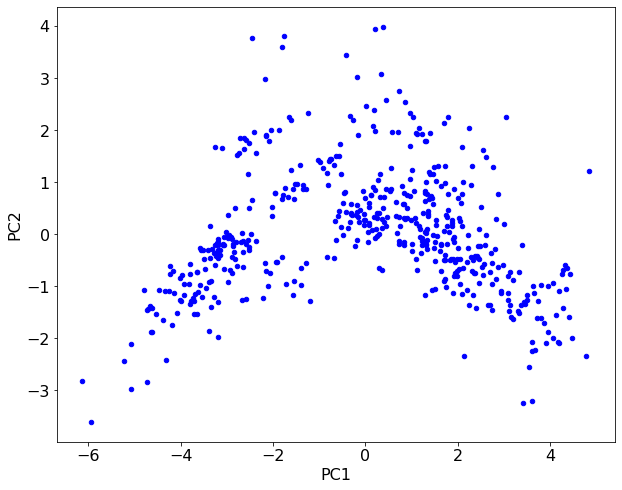

In [45]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=10,8
plt.rcParams['font.size']=16
ax1=df_pca.plot.scatter(x='PC1',y='PC2',c='blue')

8) **Vectorizing features and target together for model development**

In [46]:
output= assembler.transform(dataset)

#Input v/s Output
finalized_data=output.select(['Attributes','medv'])
finalized_data.show(5)

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
+--------------------+----+
only showing top 5 rows



**9 - 12**

**Fit model for linear regression**

**Find out model coefficients and intercept**

**Evaluate model for test dataset**

In [51]:
from pyspark.ml.regression import LinearRegression

#Splitting the dataset
train_data,test_data= finalized_data.randomSplit([0.80,0.20])

regressor=LinearRegression(featuresCol='Attributes',labelCol='medv')

#learn to fit the model from training set
regressor=regressor.fit(train_data)

#coefficient of the regression model
coeff=regressor.coefficients

#X and Y intercept
intr=regressor.intercept

print("The coefficient of the model is : %a" %coeff)
print("The intercept of the model is : %f" %intr)


#To predict the prices of testing set
pred=regressor.evaluate(test_data)

#predict the model
pred.predictions.show(5)


     

The coefficient of the model is : DenseVector([-0.1082, 0.0496, 0.0019, 2.6954, -17.1628, 3.5962, 0.0024, -1.433, 0.2887, -0.0117, -1.0133, 0.008, -0.5181])
The intercept of the model is : 38.836250
+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|30.351085075070976|
|[0.01538,90.0,3.7...|44.0| 37.72456861852913|
|[0.01709,90.0,2.0...|30.1|25.937376051188146|
|[0.0187,85.0,4.15...|23.1|25.709786131628313|
|[0.01965,80.0,1.7...|20.1| 20.70689517333571|
+--------------------+----+------------------+
only showing top 5 rows



In [52]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='medv',predictionCol='prediction',metricName='rmse')

#Root Mean Square Error
rmse=eval.evaluate(pred.predictions)
print("RMSE : %.3f" %rmse)

#Mean Square Error
mse=eval.evaluate(pred.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

#Mean Absolute Error
mae=eval.evaluate(pred.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" % mae)

#r2 - Coefficient of determination
r2=eval.evaluate(pred.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)
     

RMSE : 5.616
MSE : 31.538
MAE : 4.123
r2 : 0.635


In [61]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator

In [66]:
regressorRF = RandomForestRegressor (featuresCol = "Attributes", labelCol="medv")
pipeline = Pipeline(stages=[assembler, regressorRF])
pipeline.write().overwrite().save("pipeline")
#Hyperparameter Tuning
pipelineModel = Pipeline.load("pipeline")
paramGrid = ParamGridBuilder ().addGrid (regressorRF.numTrees, [100, 500]).build()
eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction",metricName="rmse")
crossval = CrossValidator(estimator=pipelineModel, estimatorParamMaps= paramGrid, evaluator=RegressionEvaluator(labelCol="medv"), numFolds=5)
train_data, test_data = dataset.randomSplit([0.8,0.2], seed = 123)
cvModel=crossval.fit(train_data)



In [69]:
bestModel=cvModel.bestModel
for x in range(len(bestModel.stages)):
    print(bestModel.stages[x])

VectorAssembler_8d61acc43189
RandomForestRegressionModel: uid=RandomForestRegressor_75cea5aa70ef, numTrees=100, numFeatures=13


In [72]:
pred=cvModel.transform(test_data)
pred.select("medv","prediction").show()

+----+------------------+
|medv|        prediction|
+----+------------------+
|22.0| 24.21099868879016|
|50.0| 43.85853155356296|
|30.1|31.043811730918346|
|32.9| 36.26596049480278|
|24.7|24.282114891250146|
|34.7|35.725549757918216|
|18.5|  20.7826870884744|
|31.2| 28.19677922427075|
|33.4| 34.43597939871835|
|20.6|21.561047643988395|
|34.9| 36.90211318711934|
|19.4|22.728403592924202|
|48.5|45.732429183710586|
|24.8|23.294352118641573|
|28.0| 26.85554625406939|
|19.4|21.724146841998007|
|22.5|21.150416140295288|
|27.1| 24.24392729738431|
|29.0| 33.79302161408562|
|33.1| 29.85593833471883|
+----+------------------+
only showing top 20 rows



In [73]:
eval = RegressionEvaluator(labelCol="medv")
rmse= eval.evaluate(pred)
mse=eval.evaluate(pred, {eval.metricName:"mse"})
mae=eval.evaluate(pred, {eval.metricName:"mae"})
r2=eval.evaluate(pred, {eval.metricName:"r2"})

In [74]:
print("RMSE: %.3f" %rmse)
print("MSE: %.3f" %mse)
print("MAE: %.3f" %mae)
print("r2: %.3f" %r2)

RMSE: 3.044
MSE: 9.265
MAE: 2.314
r2: 0.883
